In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

In [2]:
# Install
!pip install xlrd==1.2.0

In [3]:
!pip install openpyxl

In [3]:
# Reading Data
data = pd.read_excel('../raw_data/data_siniestros.xlsx', engine='openpyxl')

In [5]:
data.head()

,SINIESTRO,ESTATUS,RAMOID,ENFERMEDAD,TIPO_SIN,TP_PROVEEDOR,ESTADO,SEXO,EDAD,CD_PAIS,MONTO USD,FECHA CONTITUCION,Rango Edad,Hospitalizacion-Ambulatorio
0,1,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,397,2020-12-11,60-69,Ambulatorio
1,2,PAGADO,COLECTIVO,Gonartrosis [Artrosis De La Rodilla],CARTA AVAL,CLINICA,Distrito Capital,M,76,29,457,2021-01-15,Mayor a 70,Ambulatorio
2,3,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,188,2021-01-27,60-69,Ambulatorio
3,4,PAGADO,COLECTIVO,Traumatismo Superficial Del Hombro Y Del Brazo,CARTA AVAL,CLINICA,Distrito Capital,M,45,29,45,2019-11-11,40-49,Ambulatorio
4,5,PAGADO,COLECTIVO,Cervicalalgia/Hernia Discal,CARTA AVAL,CLINICA,Distrito Capital,F,54,29,30,2019-11-25,50-59,Ambulatorio


In [6]:
# Examining data
data.shape


(183619, 14)

In [7]:
data.describe()


,SINIESTRO,EDAD,CD_PAIS,MONTO USD
count,183619.000000,183619.000000,183619.000000,1.836190e+05
mean,91810.000000,44.501506,27.801017,1.443752e+04
std,53006.383877,22.409870,5.810547,3.253159e+05
min,1.000000,0.000000,1.000000,0.000000e+00
25%,45905.500000,30.000000,29.000000,2.200000e+01
50%,91810.000000,46.000000,29.000000,8.500000e+01
75%,137714.500000,62.000000,29.000000,4.100000e+02
max,183619.000000,100.000000,100.000000,6.317898e+07


In [8]:
data.dtypes

SINIESTRO                               int64
ESTATUS                                object
RAMOID                                 object
ENFERMEDAD                             object
TIPO_SIN                               object
TP_PROVEEDOR                           object
ESTADO                                 object
SEXO                                   object
EDAD                                    int64
CD_PAIS                                 int64
MONTO USD                               int64
FECHA CONTITUCION              datetime64[ns]
Rango Edad                             object
Hospitalizacion-Ambulatorio            object
dtype: object

In [9]:
data = data.drop(columns= 'SINIESTRO')

In [10]:
# Renaming columns

data = data.rename(columns={'ESTATUS': 'status', 'RAMOID': 'insurance_type', 'ENFERMEDAD': 'disease'\
                            ,'TIPO_SIN':'claim_type', 'TP_PROVEEDOR': 'provider_type', 'ESTADO':'state','SEXO':'sex'\
                            ,'EDAD':'age','CD_PAIS':'country_id', 'MONTO USD':'amount', 'FECHA CONTITUCION': 'date_issue'\
                            ,'Rango Edad':'age_range', 'Hospitalizacion-Ambulatorio': 'h_type'})
data.head()

,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
0,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,397,2020-12-11,60-69,Ambulatorio
1,PAGADO,COLECTIVO,Gonartrosis [Artrosis De La Rodilla],CARTA AVAL,CLINICA,Distrito Capital,M,76,29,457,2021-01-15,Mayor a 70,Ambulatorio
2,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,188,2021-01-27,60-69,Ambulatorio
3,PAGADO,COLECTIVO,Traumatismo Superficial Del Hombro Y Del Brazo,CARTA AVAL,CLINICA,Distrito Capital,M,45,29,45,2019-11-11,40-49,Ambulatorio
4,PAGADO,COLECTIVO,Cervicalalgia/Hernia Discal,CARTA AVAL,CLINICA,Distrito Capital,F,54,29,30,2019-11-25,50-59,Ambulatorio


In [11]:
# Checking duplicates

len(data) # Check number of rows before removing duplicates


183619

In [12]:
data = data.drop_duplicates() # Remove duplicates
len(data)# Check new number of rows

# Duplicates were dropped, 182856 rows remaining

182856

In [13]:
# Checking null values
data.isnull().sum().sort_values(ascending=False) #NaN count for each column
data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

# state and provider_type have 70% of Null 

state             0.697385
provider_type     0.697193
status            0.000000
insurance_type    0.000000
disease           0.000000
claim_type        0.000000
sex               0.000000
age               0.000000
country_id        0.000000
amount            0.000000
date_issue        0.000000
age_range         0.000000
h_type            0.000000
dtype: float64

In [14]:
# Replacing nulls with non-null values

data['state'].replace(np.nan, "Estado No Identificado", inplace=True)
data['provider_type'].replace(np.nan, "No Informado", inplace=True)
data.isnull().sum().sort_values(ascending=False)/len(data)


status            0.0
insurance_type    0.0
disease           0.0
claim_type        0.0
provider_type     0.0
state             0.0
sex               0.0
age               0.0
country_id        0.0
amount            0.0
date_issue        0.0
age_range         0.0
h_type            0.0
dtype: float64

In [13]:
# Changing FECHA CONSTITUCION to date time type
#data['FECHA CONTITUCION'] = pd.to_datetime(data['FECHA CONTITUCION'], infer_datetime_format=True)


In [14]:
# Changing MONTO USD to float type
# data['MONTO USD'] = [x.replace('.', '') for x in data['MONTO USD']]
# data['MONTO USD'] = [x.replace(',', '.') for x in data['MONTO USD']]
# data['MONTO USD'] = data['MONTO USD'].astype(float)

In [15]:
data.dtypes

status                    object
insurance_type            object
disease                   object
claim_type                object
provider_type             object
state                     object
sex                       object
age                        int64
country_id                 int64
amount                     int64
date_issue        datetime64[ns]
age_range                 object
h_type                    object
dtype: object

In [16]:
data.describe()

,age,country_id,amount
count,182856.000000,182856.000000,1.828560e+05
mean,44.496369,27.804814,1.448557e+04
std,22.414890,5.803874,3.259869e+05
min,0.000000,1.000000,0.000000e+00
25%,30.000000,29.000000,2.200000e+01
50%,46.000000,29.000000,8.500000e+01
75%,62.000000,29.000000,4.120000e+02
max,100.000000,100.000000,6.317898e+07


In [17]:
# Grouping data by days, each day will have only one row

data_days = data.groupby('date_issue', as_index = False).agg({'amount': 'sum'})

# Renaming columns

data_days.columns = ['date_issue','total_amount_claims']

data_days.head()

,date_issue,total_amount_claims
0,2017-01-01,57703
1,2017-01-02,835522
2,2017-01-03,244917
3,2017-01-04,765181
4,2017-01-05,554370


/Users/santiagochiesa/.pyenv/versions/3.8.6/envs/Insurance_claiming_forecasting/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_amount_claims', ylabel='Density'>

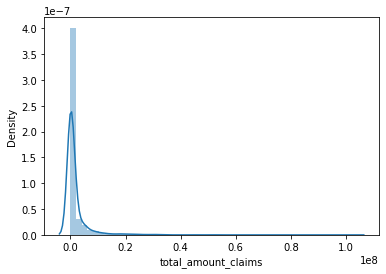

In [19]:
sns.distplot(data_days['total_amount_claims'])

In [ ]:
data_days['total_amount_claims'].describe()

<AxesSubplot:xlabel='total_amount_claims', ylabel='date_issue'>

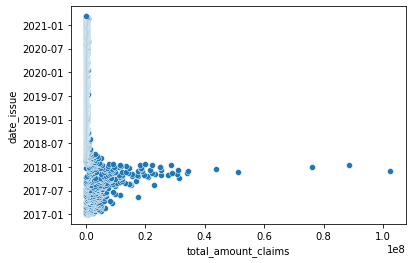

In [18]:
# Plotting data 

sns.scatterplot(x="total_amount_claims", y="date_issue", data=data_days)

In [19]:
# Setting index as date, to plot time series

data_days_plotting = data_days.set_index('date_issue')

<AxesSubplot:xlabel='date_issue'>

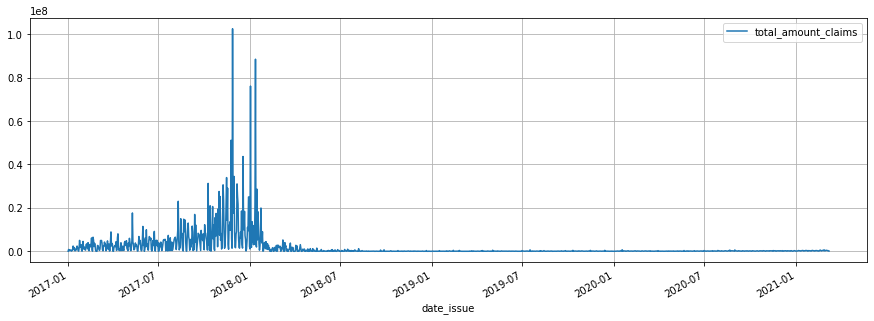

In [20]:
# Plotting time series

data_days_plotting.plot(grid=True, figsize=(15,5))

<AxesSubplot:xlabel='date_issue'>

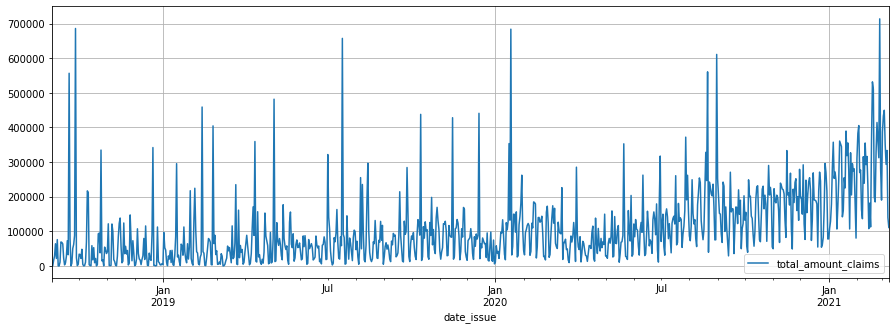

In [21]:
# Exchange rate difference before 09-2018 so we will trim the plot

start_date = datetime(2018, 9, 1)
end_date = datetime(2021, 3, 8)
date_filter = (data_days_plotting.index >= start_date) & (data_days_plotting.index <= end_date)
data_days_plotting[date_filter].plot(grid=True, figsize=(15,5))

In [20]:
# Plot looks normal from 09-2018 so we will trim the dataset and keep data from 09-2018 onwards

data_days_trim = data_days.loc[(data_days['date_issue'] >= datetime(2018, 9, 1))]



/Users/santiagochiesa/.pyenv/versions/3.8.6/envs/Insurance_claiming_forecasting/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_amount_claims', ylabel='Density'>

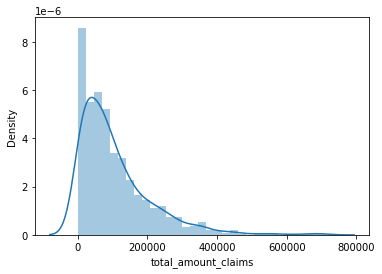

In [21]:
sns.distplot(data_days_trim['total_amount_claims'])

In [23]:
# Creating a new data frame for FB Prophet

fb_data = pd.DataFrame(data_days_trim[['date_issue', 'total_amount_claims']]).copy()
fb_data['ds'] = fb_data['date_issue']
fb_data['y'] = fb_data['total_amount_claims']
fb_data = fb_data.drop(columns = ['date_issue', 'total_amount_claims'])
fb_data

,ds,y
605,2018-09-01,168
606,2018-09-02,346
607,2018-09-03,16169
608,2018-09-04,28529
609,2018-09-05,64135
...,...,...
1520,2021-03-04,350720
1521,2021-03-05,293427
1522,2021-03-06,333658
1523,2021-03-07,139824


In [24]:
len(fb_data)

920

In [25]:
# Installing FB Prophet
!pip install fbprophet


In [28]:
#Importing FB Prophet
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [25]:
split = 0.7
split_index = round(len(fb_data)*split)

train = fb_data.iloc[:split_index]
test = fb_data.iloc[split_index:]

train.head(), train.tail()


(            ds      y
 605 2018-09-01    168
 606 2018-09-02    346
 607 2018-09-03  16169
 608 2018-09-04  28529
 609 2018-09-05  64135,
              ds       y
 1244 2020-06-01  121249
 1245 2020-06-02   84303
 1246 2020-06-03  134081
 1247 2020-06-04  106453
 1248 2020-06-05  103524)

In [26]:
test.head(), test.tail()

(             ds       y
 1249 2020-06-06   57229
 1250 2020-06-07   31314
 1251 2020-06-08  104379
 1252 2020-06-09  125668
 1253 2020-06-10   97142,
              ds       y
 1520 2021-03-04  350720
 1521 2021-03-05  293427
 1522 2021-03-06  333658
 1523 2021-03-07  139824
 1524 2021-03-08  111107)

In [29]:
#Fitting model
model = Prophet(seasonality_mode='multiplicative')

model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
#Predicting
forecast_test = model.predict(test)
forecast_test.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-06-06,89564.807885,-52944.029344,145581.136385,89564.807885,89564.807885,-0.498692,-0.498692,-0.498692,-0.498692,-0.498692,-0.498692,0.0,0.0,0.0,44899.523123
1,2020-06-07,89609.957699,-76678.941881,115735.638191,89609.957699,89609.957699,-0.745150,-0.745150,-0.745150,-0.745150,-0.745150,-0.745150,0.0,0.0,0.0,22837.101098
2,2020-06-08,89655.107512,2758.239502,193846.773814,89655.107512,89655.107512,0.108976,0.108976,0.108976,0.108976,0.108976,0.108976,0.0,0.0,0.0,99425.329999
3,2020-06-09,89700.257326,-5547.353751,190620.503787,89700.257326,89700.257326,0.092639,0.092639,0.092639,0.092639,0.092639,0.092639,0.0,0.0,0.0,98010.024277
4,2020-06-10,89745.407140,25959.571228,216884.544982,89745.407140,89745.407140,0.342020,0.342020,0.342020,0.342020,0.342020,0.342020,0.0,0.0,0.0,120440.139929


In [31]:
# Create a data frame to compare Y in train with the prediction of FB prophet

merged_df = test.merge(forecast_test, on='ds', how='left')
merged_df
test_vs_pred_df = pd.DataFrame(merged_df[['ds', 'y', 'yhat']]).copy()
test_vs_pred_df['absolute_error'] = abs(test_vs_pred_df['y'] - test_vs_pred_df['yhat'])
test_vs_pred_df

,ds,y,yhat,absolute_error
0,2020-06-06,57229,44899.523123,12329.476877
1,2020-06-07,31314,22837.101098,8476.898902
2,2020-06-08,104379,99425.329999,4953.670001
3,2020-06-09,125668,98010.024277,27657.975723
4,2020-06-10,97142,120440.139929,23298.139929
...,...,...,...,...
271,2021-03-04,350720,147020.543924,203699.456076
272,2021-03-05,293427,127918.368157,165508.631843
273,2021-03-06,333658,51078.590638,282579.409362
274,2021-03-07,139824,25978.356967,113845.643033


In [32]:
test_vs_pred_df['absolute_error'].mean()

96596.02108637994

In [34]:
test_vs_pred_df.describe()

,y,yhat,absolute_error
count,276.000000,276.000000,276.000000
mean,186495.829710,95384.970384,96596.021086
std,106490.658832,40118.285071,87050.313468
min,11148.000000,22837.101098,348.163991
25%,108727.250000,49454.604945,32348.131822
50%,176281.000000,108626.623001,76504.454005
75%,243970.750000,126048.139841,136045.301623
max,713904.000000,147020.543924,586382.590087


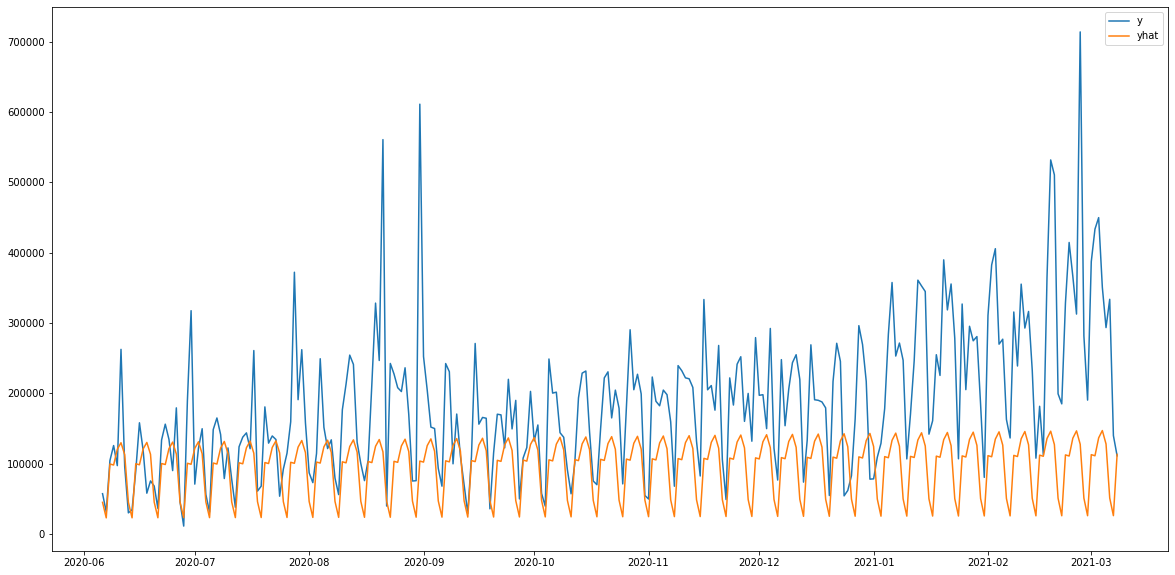

In [35]:
# Setting index as date, to plot time series

test_vs_pred_df_plotting = test_vs_pred_df.set_index('ds')
plt.figure(figsize=(20,10))
plt.plot( 'y', data= test_vs_pred_df_plotting)
plt.plot( 'yhat', data= test_vs_pred_df_plotting)
plt.legend()

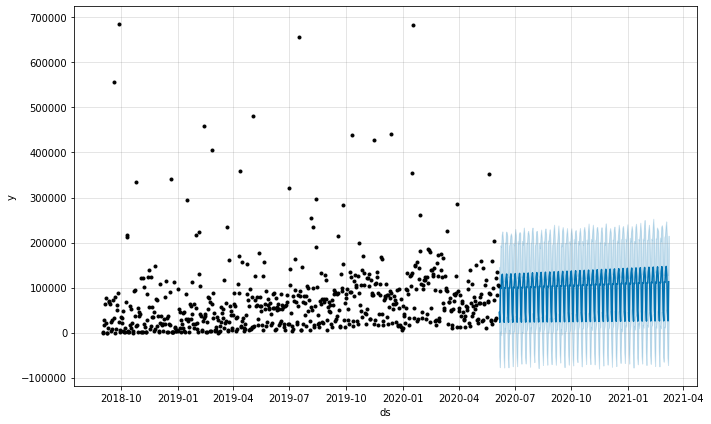

In [36]:
# Build-in plot
model.plot(forecast_test);

In [37]:
# Predict the next 60 datapoints
future = model.make_future_dataframe(periods=1, freq='MS') 
forecast_future = model.predict(future)
forecast_future.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
640,2020-06-02,89384.208629,1614.876782,190029.996451,89384.208629,89384.208629,0.092639,0.092639,0.092639,0.092639,0.092639,0.092639,0.0,0.0,0.0,97664.697058
641,2020-06-03,89429.358443,17497.967018,216631.033599,89429.358443,89429.358443,0.342020,0.342020,0.342020,0.342020,0.342020,0.342020,0.0,0.0,0.0,120015.996227
642,2020-06-04,89474.508257,32791.557502,225105.864018,89474.508257,89474.508257,0.444204,0.444204,0.444204,0.444204,0.444204,0.444204,0.0,0.0,0.0,129219.432452
643,2020-06-05,89519.658071,22492.102843,205807.628320,89519.658071,89519.658071,0.256003,0.256003,0.256003,0.256003,0.256003,0.256003,0.0,0.0,0.0,112436.996650
644,2020-07-01,90693.553230,20977.946592,225421.604674,90680.942875,90705.996847,0.342020,0.342020,0.342020,0.342020,0.342020,0.342020,0.0,0.0,0.0,121712.571037


In [33]:
!pip install ipywidgets 

In [38]:
from ipywidgets import IntProgress

In [35]:
!pip install --upgrade jupyter_client

In [39]:
# A REVISAR

from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

initial = '180 days' # Size/time frame of training set
period = '30 days' # The spacing between cutoff dates for each cross valication run
horizon = '60 days' # How much you want to predict/valudation set size
df_cv = cross_validation(model, initial=initial, period=period, horizon=horizon)


INFO:fbprophet:Making 14 forecasts with cutoffs between 2019-03-13 00:00:00 and 2020-04-06 00:00:00


  0%|          | 0/14 [00:00<?, ?it/s]

In [40]:
performance_metrics(df_cv)


,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,9.494042e+09,97437.373477,46727.162983,0.669872,0.440500,0.916667
1,7 days,1.102742e+10,105011.519220,51853.365510,0.827390,0.463687,0.904762
2,8 days,9.523129e+09,97586.518346,46971.745130,0.775478,0.390923,0.916667
3,9 days,1.067157e+10,103303.278950,52345.437419,0.833967,0.486946,0.904762
4,10 days,1.014644e+10,100729.537968,49644.953567,0.786571,0.467636,0.916667
5,11 days,1.542517e+10,124198.115529,58690.689317,0.776948,0.488712,0.892857
6,12 days,9.494149e+09,97437.923774,47430.774848,0.666834,0.475692,0.904762
7,13 days,7.933367e+09,89069.452775,42059.558899,0.660587,0.472908,0.928571
8,14 days,7.951929e+09,89173.589844,42152.559009,0.668276,0.451360,0.928571
9,15 days,6.457734e+09,80360.028249,33518.741308,0.574283,0.334276,0.964286


In [41]:
cv_performance_metrics = performance_metrics(df_cv)
cv_performance_metrics[cv_performance_metrics['mae'] == cv_performance_metrics['mae'].min()]

,horizon,mse,rmse,mae,mape,mdape,coverage
54,60 days,1.743939e+09,41760.493321,28095.25834,0.521448,0.366682,0.97619


In [42]:
# MAE of 60 days prediction compared to monthly expenditure of 14 million in 60 days
((28095.25834*60)/14000000)*100

12.040825002857144

In [ ]:
# Hacer un notebook con limpieza de datos que genere csv limpio (clean_data)
# Testear distintos modelos